In [ ]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.3.0


In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range = 40
)

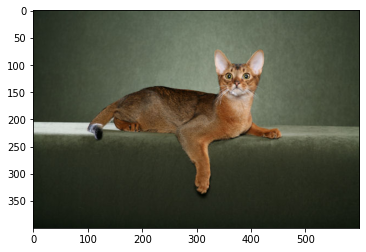

In [ ]:
image_path = '/content/sample_data/images/train/cat.jpg'

plt.imshow(plt.imread(image_path));


Found 2 images belonging to 3 classes.


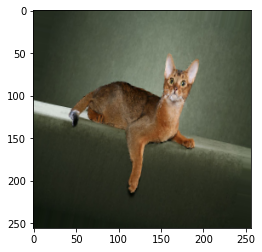

In [ ]:
x, y = next(generator.flow_from_directory('sample_data', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range = [-100,-50,0,50,100],
    height_shift_range=[-50,0,50]
    
)

Found 2 images belonging to 3 classes.


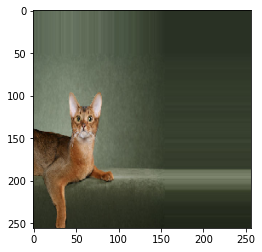

In [ ]:
x, y = next(generator.flow_from_directory('sample_data', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 2 images belonging to 3 classes.


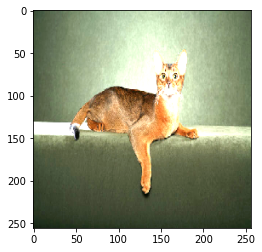

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range=(0.5,2.)
)

x, y = next(generator.flow_from_directory('sample_data', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 2 images belonging to 3 classes.


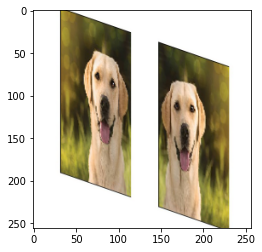

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range=40
)

x, y = next(generator.flow_from_directory('sample_data', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 2 images belonging to 3 classes.


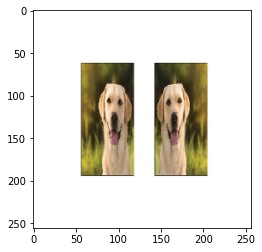

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('sample_data', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 2 images belonging to 3 classes.


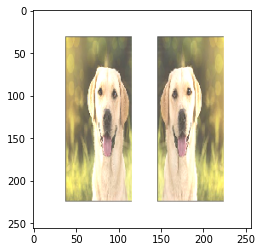

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('sample_data', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [ ]:
x.mean()

213.63734

In [ ]:
np.array(Image.open(image_path)).mean()

69.57810416666666

Found 2 images belonging to 3 classes.


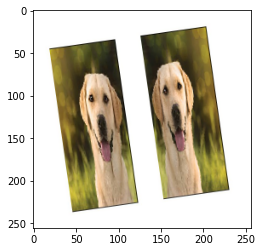

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=30
)

x, y = next(generator.flow_from_directory('sample_data', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.04915813 0.8450792 [[5]]
120.70756512369792


In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

1.2417634e-08 1.0 [[7]]


In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [ ]:
print(x.mean(), x.std(), y)

0.07621784 0.5852584 [[3]]


In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=30

)

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False,input_shape=(32,32,3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10,activation='softmax')                              
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
_=model.fit(
    generator.flow(x_train,y_train,batch_size=32),
    epochs=1,steps_per_epoch=10
)

10/10 [==============================] - 3s 257ms/step - loss: 3.3394 - accuracy: 0.1281
